# PROBLEMA DE CLASIFICACIÓN SUPERVISADA
## TARGET - VARIABLE :
“¿Terminó comprando una póliza con nosotros?” (codificada como 0 = No compra, 1 = Sí compra)


**Modelos predictivos supervisados que podemos trabajar:**

**Regresión logística**

- Modelo base y muy interpretativo.
- Nos permite estimar la probabilidad de compra en función de las variables explicativas (edad, sexo, ocupación, tipo de vehículo, motivos, etc.).
- Ventaja: de facil explicacion en un contexto academico.


**Árboles de decisión (Decision Tree)**

- Clasifica a los clientes según reglas claras (ejemplo: edad > 30 y vehículo = nuevo → mayor probabilidad de compra).
- Ventaja: muy visual y útil para presentaciones ejecutivas.


**Random Forest**

- Conjunto de múltiples árboles de decisión.
- Mejora la precisión y reduce el riesgo de sobreajuste.
- Ventaja: robusto y maneja bien variables categóricas codificadas como dummies.

*¿Que es una variable dummy?*
Una variable dummy convierte una categoría en un valor binario.
Los hemos usado en nuestro dataset porque los modelos matemáticos y de machine learning trabajan mejor con números que con texto.

In [1]:
#Trabajando con Python y scikit-learn

# 1. Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# 2. Cargamos el dataset
df = pd.read_csv("../data/seguros_sintetico.csv")

In [3]:
print(df.columns.tolist())


['1. Edad:', '2. Sexo:', '3. Ocupación principal:', '4. ¿Cómo nos conoció?', '5. ¿Qué tan fácil fue contactarnos?', '6. Tipo de vehículo que posee:', '7. Uso principal del vehículo', '8. ¿Con qué frecuencia utiliza su vehículo?', '10. ¿Qué tan importante es para usted contar con un seguro actualmente?', '11. ¿Cuál es el principal motivo por el que contrataría un seguro?', '12. ¿Ha solicitado información sobre pólizas anteriormente?', '13. ¿Terminó comprando una póliza con nosotros?', '9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción) - Abastecimiento de combustible', '9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción) - Asistencia mecánica', '9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción) - Cobertura contra desastres naturales', '9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción) - Daños a terceros', '9. ¿Qué cobertura le i

In [4]:
df["target_binaria"] = df["13. ¿Terminó comprando una póliza con nosotros?"].replace({
    3: 1,  # Sí
    1: 1,  # Interesada
    2: 0,  # No interesado
    0: 0   # Vacío
})

# Verificación rápida
print(df["target_binaria"].value_counts())


target_binaria
1    66
0    16
Name: count, dtype: int64


In [5]:
X = df.drop(columns=["target_binaria"])
y = df["target_binaria"]


In [6]:
# 4. Separamos para el entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
#Entrenamiento de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [8]:
print(y_test.unique())


[1 0]


# RESULTADOS DE EVALUACION DE DESEMPEÑO

- Matriz de confusión → para ver aciertos y errores en clasificación.

- Reporte de clasificación → precisión, recall y F1-score.

- ROC-AUC → calidad del modelo en distinguir entre positivos y negativos.

- Gráfico de importancia de variables → qué factores influyen más en la predicción.


Logistic Regression
[[ 0  5]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.79      0.95      0.86        20

    accuracy                           0.76        25
   macro avg       0.40      0.47      0.43        25
weighted avg       0.63      0.76      0.69        25

ROC-AUC: 0.25


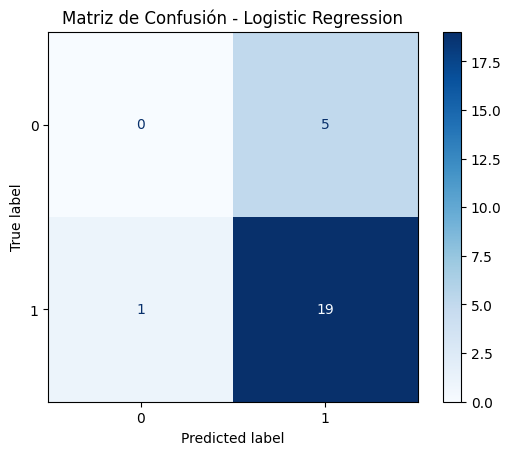


Random Forest
[[ 1  4]
 [ 0 20]]
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.83      1.00      0.91        20

    accuracy                           0.84        25
   macro avg       0.92      0.60      0.62        25
weighted avg       0.87      0.84      0.79        25

ROC-AUC: 0.82


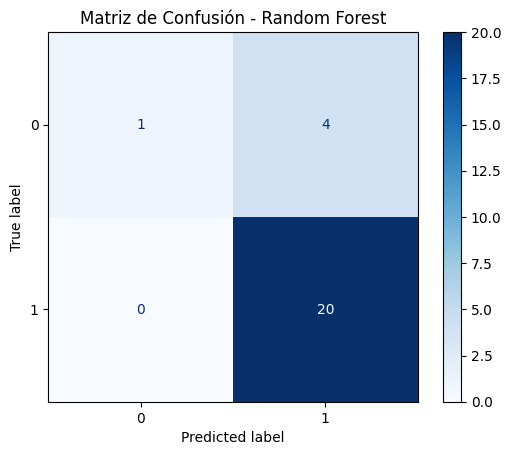

In [9]:
#Evaluamos desempeño
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluación y visualización por modelo
for model, name in [(log_model, "Logistic Regression"), (rf_model, "Random Forest")]:
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

    # Plot de matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()


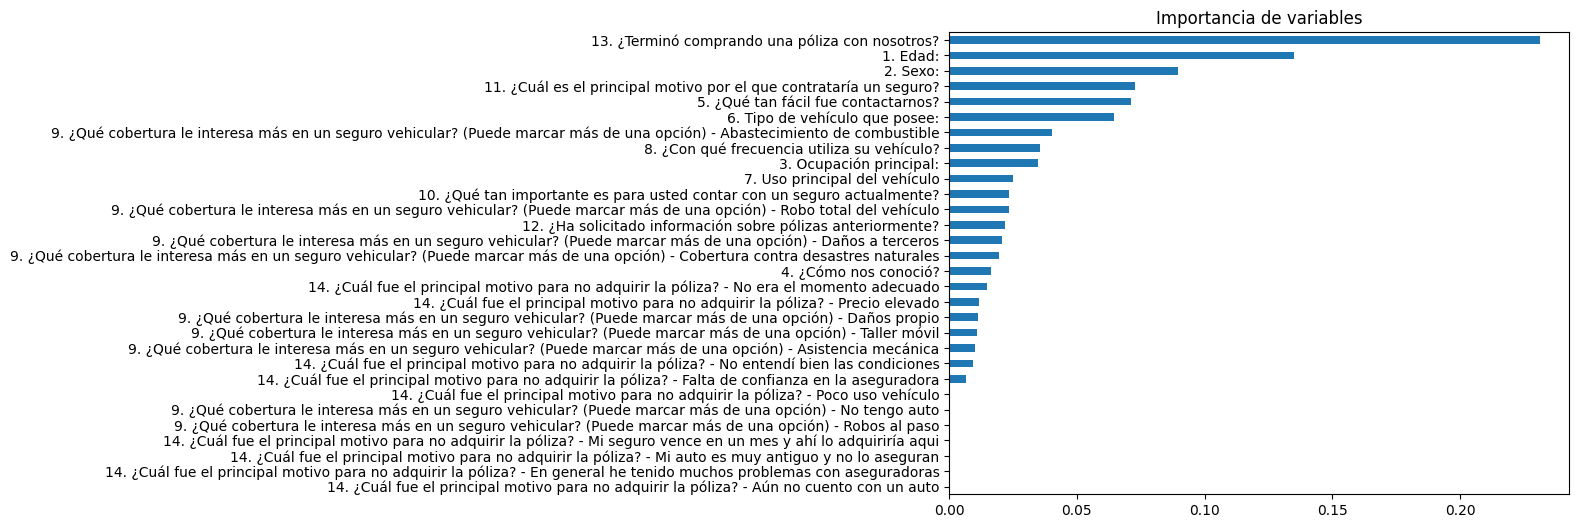

In [10]:
#Visualización e importancia - Random Forest

import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Importancia de variables")
plt.show()


#Comparación grafica de las curvas ROC en ambos modelos
- Una curva ROC para cada modelo en el mismo gráfico.

- El AUC de cada modelo mostrado en la leyenda.

- Una línea diagonal de referencia (clasificación aleatoria).

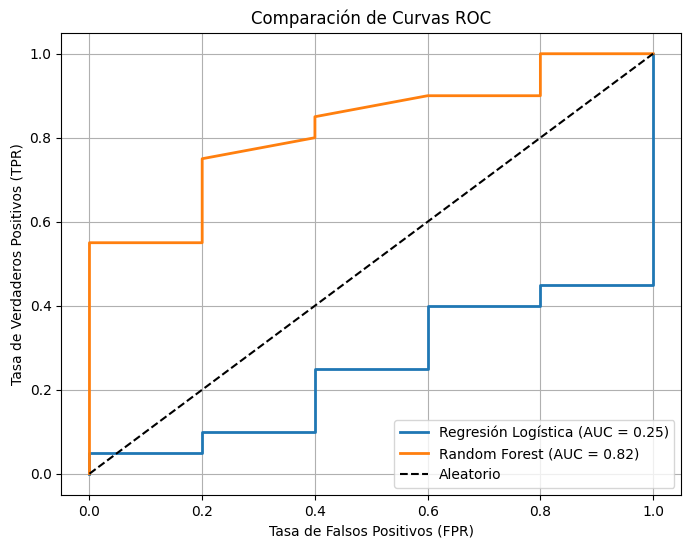

In [11]:
#========================================================
#Comparación grafica de las curvas ROC en ambos modelos
#========================================================

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades de cada modelo
log_probs = log_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Curvas ROC
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# AUC
auc_log = roc_auc_score(y_test, log_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

# Gráfico comparativo
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Regresión Logística (AUC = {auc_log:.2f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#CONCLUSIONES Y RECOMENDACIONES

**Conclusiones**

*Desempeño del modelo*
El analisis comparativo muestra que el modelo *Random Forest* tiene un desempeño significativamente superior frente a la *Regresión Logistica* especialmente en métricas clave como *recall* y *F1-score*, y *ROC-AUC (0.82)*. Lo que indica que *Random Forest* distingue con mucha mayor precisión entre cleintes.

*Capacidad predictiva*
La regresión logistíca, presenta un AUC de 0.25, mostrando un comportamiento cercano, o incluso inferior al que obtendriamos con el azar, lo cual confirma que no es bueno capturando patrones relevantes, mientras que el Random Forest representan una alta capacidad de discriminación.

*Importancia de variables*
El analisis de importancia revela como ¿Terminó comprando una póliza con nosotros?”, edad, sexo, y motivo principal para contratar un seguro, influyen considerablemente en la predicción. Esto nos da la posibilidad de conocer que caracteristicas son las que nos ayudan a discernir las caracteristicas del cliente que compra versus el que no compra.

*Validacion del proceso*
El uso conjunto de la matriz de confusión, reporte de clasificación, ROC-AUC y curvas ROC, garantiza una evaluacion integral del modelo.

**Recomendaciones estratégicas**

- Utilizar el modelo Random Forest como herramienta principal, por su alto desempeño.

- Enfocar esfuerzos comerciales según las variables más relevantes, segmentar campañas considerando la edad, motivación para contratar.

- Mejorar la calidad y balance del dataset, puesto que la data esta desbalanceada, ya que se cuenta con 66 vs 16, deberiamos recolectar mas casos negativos.

- Mantener un ciclo continuo de alimentación del modelo, aplicar mas encuestas y validar consistencia en las respuestas.

- Incorporar dashboards interactivos para seguimiento, para visualizar la efectividad del modelo y la evolución con nuevas predicciones.

In [13]:
import joblib
joblib.dump(log_model, "../models/modelo_logistic_sintetico.pkl")

['../models/modelo_logistic_sintetico.pkl']

In [14]:
joblib.dump(rf_model, "../models/modelo_rf_sintetico.pkl")

['../models/modelo_rf_sintetico.pkl']

# SIMULACION CON CLIENTES NUEVOS

In [16]:
modelo_cargado = joblib.load("../models/modelo_rf_sintetico.pkl")
cliente_nuevo = X_test.iloc[[3]]
pred = model.predict(cliente_nuevo)[0]
prob = model.predict_proba(cliente_nuevo)[0][1]

print("¿Compra seguro?:", "Sí" if pred==1 else "No")
print(f"Probabilidad de compra: {prob:.2f}")

¿Compra seguro?: Sí
Probabilidad de compra: 0.87
